### Exercise 1a)

In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from general_methods import * 

In [2]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

In [3]:
np.random.seed(124)

num = 400
x = np.linspace(-1, 1, num)
y = f(x) + 0.05*np.random.normal(0, 1, num)

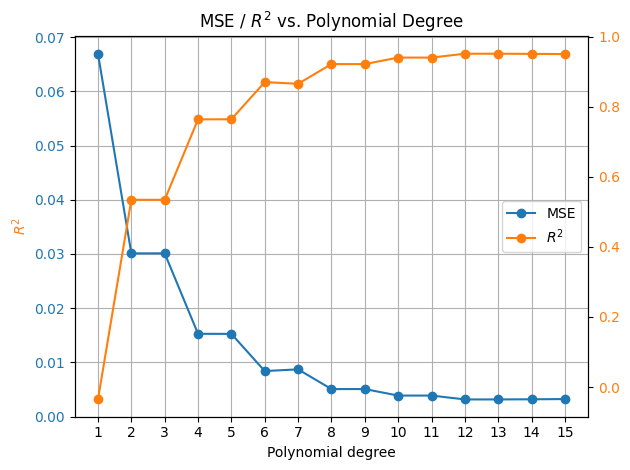

In [ ]:
# Plot the MSE and R2 scores as a function of polynomial degrees

polynomial_degrees = np.array(range(1, 16))

mse_values,r2_values = MSE_and_R2(x,y,polynomial_degrees)

# Shared plot, different axis
fig, ax1 = plt.subplots()
ax1.set_xlabel('Polynomial degree')
ax1.set_title('MSE / $R^2$ vs. Polynomial Degree')
ax1.set_xticks(polynomial_degrees)
ax1.grid()

# MSE line
color1 = "C0"
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylabel('MSE', color=color1)
mse_line, = ax1.plot(polynomial_degrees, mse_values, marker='o', color=color1, label="MSE")

# R2 line
ax2 = ax1.twinx()
color2 = "C1"
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel('$R^2$', color=color2)
r2_line, = ax2.plot(polynomial_degrees, r2_values, marker='o', color=color2, label="$R^2$")

# Legend
lines = [mse_line, r2_line]
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='center right')

plt.tight_layout()
plt.show()

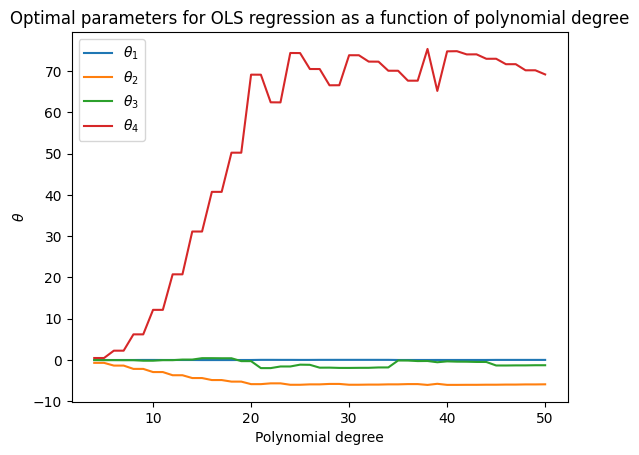

In [5]:
# Calculating and plotting optimal parameters as a function of polynomial degree.

polynomial_degrees = np.array(range(4, 51))
opt_theta_vals = np.zeros((len(polynomial_degrees),polynomial_degrees[0]))

for i in range(len(polynomial_degrees)): 
    X = polynomial_features(x, polynomial_degrees[i])
    theta,_ = opt_theta(X,y)
    opt_theta_vals[i,:] = theta[:polynomial_degrees[0]]

for i in range(opt_theta_vals.shape[1]): 
    plt.plot(polynomial_degrees,opt_theta_vals[:,i],label=fr"$\theta_{i+1}$")

plt.xlabel("Polynomial degree")
plt.ylabel(r"$\theta$")
plt.legend()
plt.title("Optimal parameters for OLS regression as a function of polynomial degree")
plt.show()


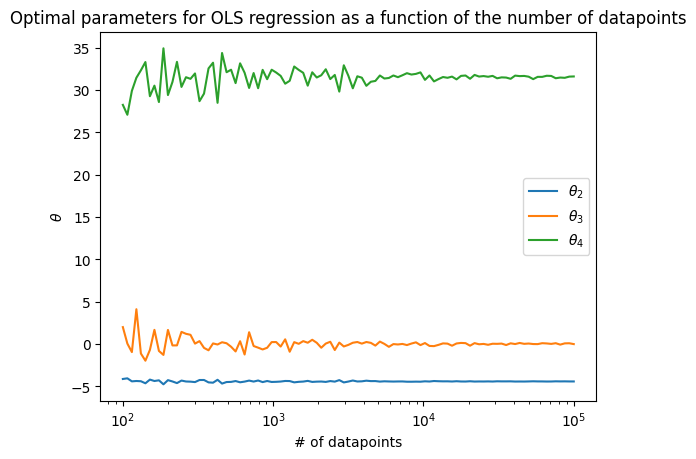

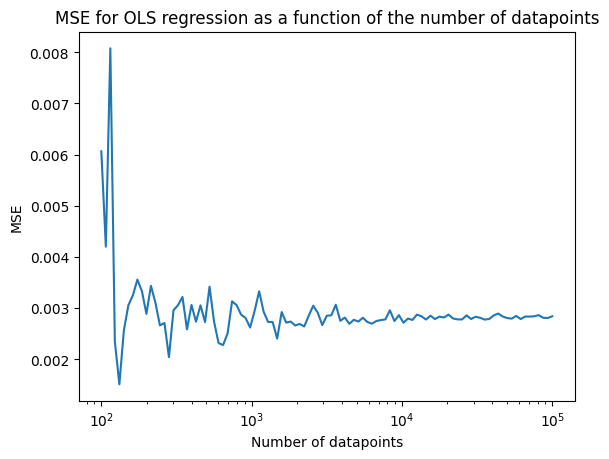

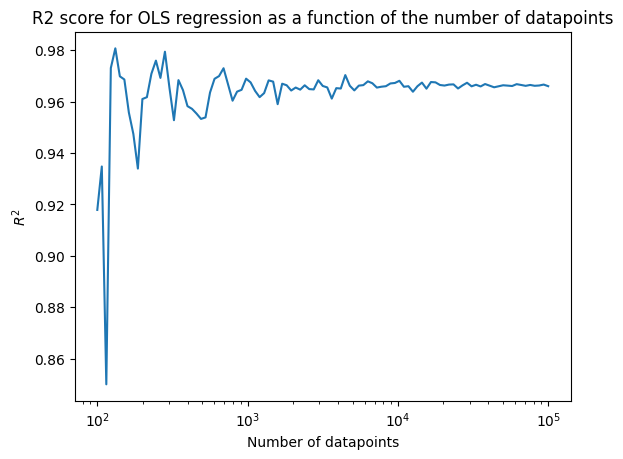

In [6]:
# Calculating and plotting optimal parameters, mse and r2 as a function of the number of datapoints.

theta_indices = np.array([2,3,4])
deg = 15
datapoints = 10**(np.linspace(2,5,101))
opt_theta_vals = np.zeros((len(datapoints),len(theta_indices)))
mse_vals = np.zeros(len(datapoints))
r2_vals = np.zeros(len(datapoints))

for i in range(len(datapoints)): 
    n = int(datapoints[i])
    x_n = np.linspace(-1, 1, n)
    y_n = f(x_n) + 0.05*np.random.normal(0, 1, n)
    X_n = polynomial_features(x_n, deg)
    theta,_ = opt_theta(X_n,y_n)
    opt_theta_vals[i,:] = theta[theta_indices-1]
    mse,r2 = MSE_and_R2(x_n,y_n,np.array([deg]))
    mse_vals[i] = mse[0]
    r2_vals[i] = r2[0]

for i in range(len(theta_indices)): 
    plt.semilogx(datapoints,opt_theta_vals[:,i],label=fr"$\theta_{theta_indices[i]}$")
    
plt.xlabel("# of datapoints")
plt.ylabel(r"$\theta$")
plt.legend()
plt.title("Optimal parameters for OLS regression as a function of the number of datapoints")
plt.show()

plt.semilogx(datapoints,mse_vals)
plt.xlabel("Number of datapoints")
plt.ylabel("MSE")
plt.title("MSE for OLS regression as a function of the number of datapoints")
plt.show()

plt.semilogx(datapoints,r2_vals)
plt.xlabel("Number of datapoints")
plt.ylabel(r"$R^2$")
plt.title("R2 score for OLS regression as a function of the number of datapoints")
plt.show()

### Exercise 1b) 

We now attempt the Ridge regression model. We use different values of lambda, and plot the MSE and R2 as a function of polynomial degree. 

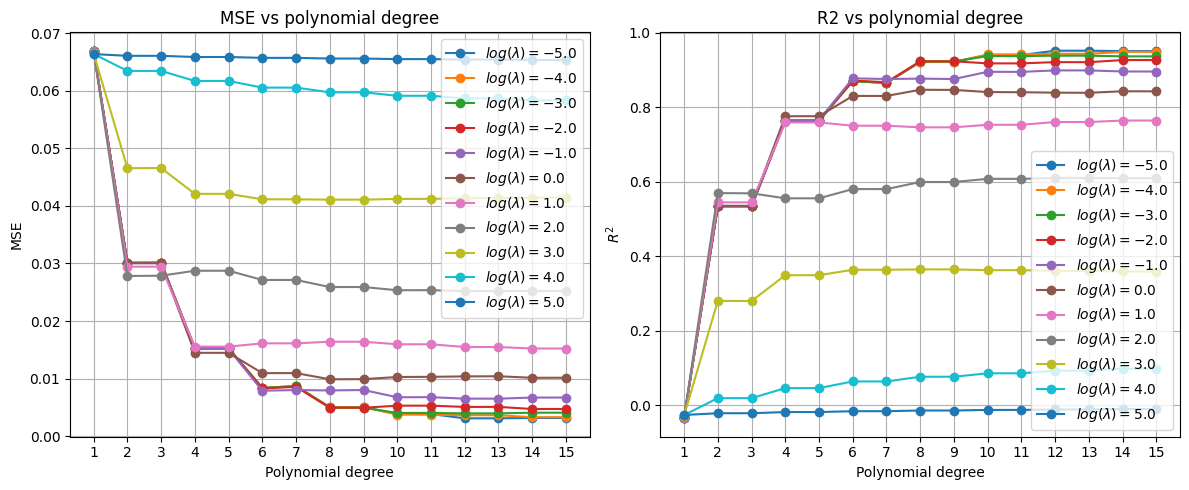

In [7]:
# Plot MSE as a function of polynomial degree, for lambda between 10^(-5) and 10^5

lamb = 10**(np.linspace(-5,5,11))

polynomial_degrees = np.array(range(1, 16))

plt.figure(figsize=(12,5))

for i in range(len(lamb)): 
    mse_values,r2_values = MSE_and_R2(x,y,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    plt.subplot(1, 2, 1)
    plt.plot(polynomial_degrees, mse_values, marker='o',label=fr"$log(\lambda) = {np.log10(lamb[i])}$")
    plt.title('MSE vs polynomial degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel('MSE')
    plt.legend()
    plt.xticks(polynomial_degrees)
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(polynomial_degrees, r2_values, marker='o',label=fr"$log(\lambda) = {np.log10(lamb[i])}$")
    plt.title('R2 vs polynomial degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel(r'$R^2$')
    plt.legend()
    plt.xticks(polynomial_degrees)
    plt.grid()

plt.tight_layout()
plt.show()

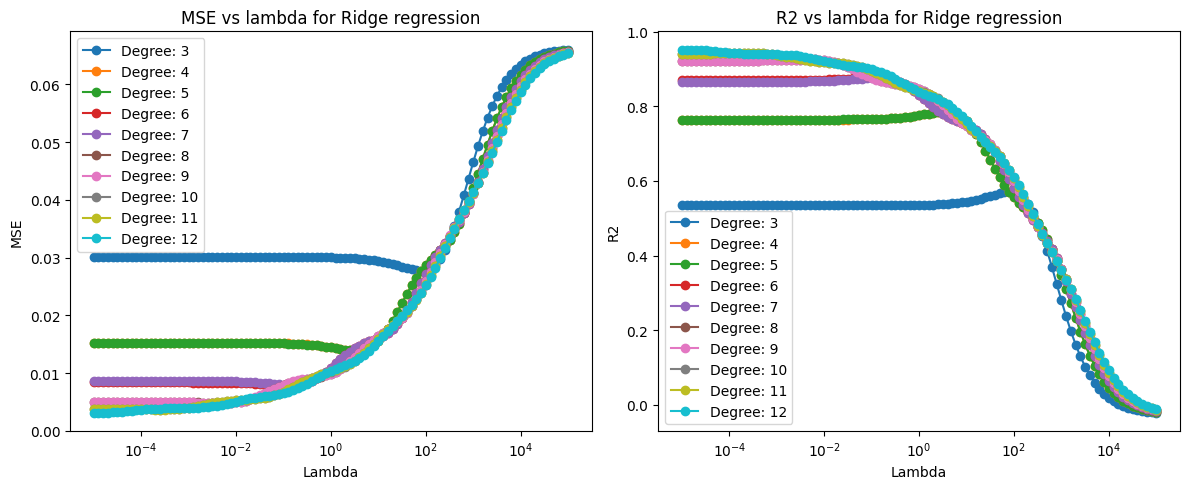

In [8]:
# Plot MSE as a function of lambda for different polynomial degrees

lamb = 10**(np.linspace(-5,5,101))

polynomial_degrees = np.array((range(3, 12+1)))

mse_values = np.zeros((len(polynomial_degrees),len(lamb)))
r2_values = mse_values.copy()

for i in range(len(lamb)): 
    mse,r2 = MSE_and_R2(x,y,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    mse_values[:,i] = mse
    r2_values[:,i] = r2

plt.figure(figsize=(12,5))

for j in range(len(polynomial_degrees)): 
    plt.subplot(1, 2, 1)
    plt.semilogx(lamb, mse_values[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")
    plt.title('MSE vs lambda for Ridge regression')
    plt.xlabel('Lambda')
    plt.legend()
    plt.ylabel('MSE')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.semilogx(lamb, r2_values[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")
    plt.title('R2 vs lambda for Ridge regression')
    plt.xlabel('Lambda')
    plt.legend()
    plt.ylabel('R2')
    plt.grid()

plt.tight_layout()
plt.show()

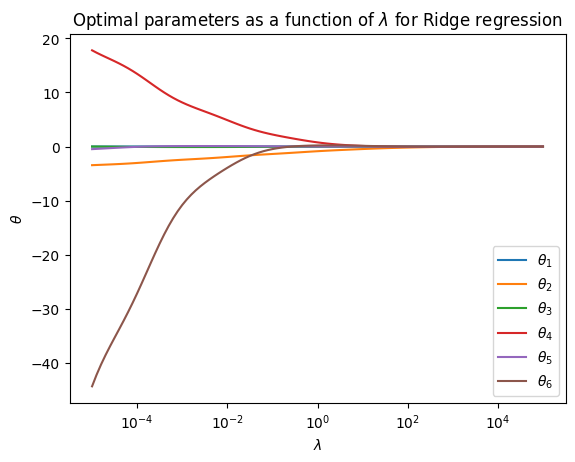

In [9]:
# Plotting optimal parameters as a function of lambda

theta_indices = np.array(range(1,7))

opt_theta_vals = np.zeros((len(lamb),len(theta_indices)))

X = polynomial_features(x,15)

for i in range(len(lamb)): 
    theta,_ = opt_theta(X,y,regression_type = "Ridge",lamb = lamb[i])
    opt_theta_vals[i,:] = theta[theta_indices - 1]

for j in range(len(theta_indices)): 
    plt.semilogx(lamb, opt_theta_vals[:,j], label=fr"$\theta_{theta_indices[j]}$")
    plt.title(r'Optimal parameters as a function of $\lambda$ for Ridge regression')
    plt.xlabel(r"$\lambda$")
    plt.legend()
    plt.ylabel(r"$\theta$")
    plt.grid()

plt.show()

In [10]:
# Values of MSE and R2 for a large number of datapoints (10^7), for different values of lambda

lamb = 10**(np.linspace(-5,5,11))

theta_indices = np.array([4])
x_ = np.linspace(-1, 1, int(1e7))
y_ = f(x_) + 0.05*np.random.normal(0, 1, int(1e7))

for i in range(len(lamb)): 
    mse,r2 = MSE_and_R2(x_,y_,np.array([deg]),regression_type = "Ridge",lamb = lamb[i])
    print("MSE value for log(lambda) = " + str(np.log10(lamb[i])) + ": " + str(mse[0]))
    print("R2 value for log(lambda) = " + str(np.log10(lamb[i])) + ": " + str(r2[0]))
    print("")
    print("")

MSE value for log(lambda) = -5.0: 0.0028221109274373488
R2 value for log(lambda) = -5.0: 0.9661806468532413


MSE value for log(lambda) = -4.0: 0.0028221267605018905
R2 value for log(lambda) = -4.0: 0.96618045711442


MSE value for log(lambda) = -3.0: 0.0028230049091750517
R2 value for log(lambda) = -3.0: 0.9661699336371873


MSE value for log(lambda) = -2.0: 0.0028696812012476403
R2 value for log(lambda) = -2.0: 0.9656105785849685


MSE value for log(lambda) = -1.0: 0.003226798235501155
R2 value for log(lambda) = -1.0: 0.9613309923437892


MSE value for log(lambda) = 0.0: 0.0035118177533851134
R2 value for log(lambda) = 0.0: 0.9579154016824435


MSE value for log(lambda) = 1.0: 0.0043737849012899935
R2 value for log(lambda) = 1.0: 0.9475858391225584


MSE value for log(lambda) = 2.0: 0.005434770492578957
R2 value for log(lambda) = 2.0: 0.9348712976612109


MSE value for log(lambda) = 3.0: 0.008026120710179345
R2 value for log(lambda) = 3.0: 0.9038173134666427


MSE value for log(lambd